# Multiple Linear Regression

### Importing Needed Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Let's select some features that we want to use for regression:

In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


Now let's plot the Emission values with resprect to Engine size:

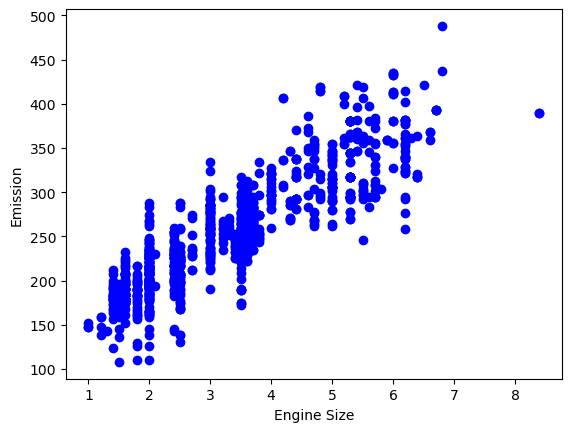

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

Let's split our dataset into train and test sets. We should use around 80% of the entire dataset for training and 20% for testing.  
We create a mask to select random rows using the __np.random.rand()__ function:

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution

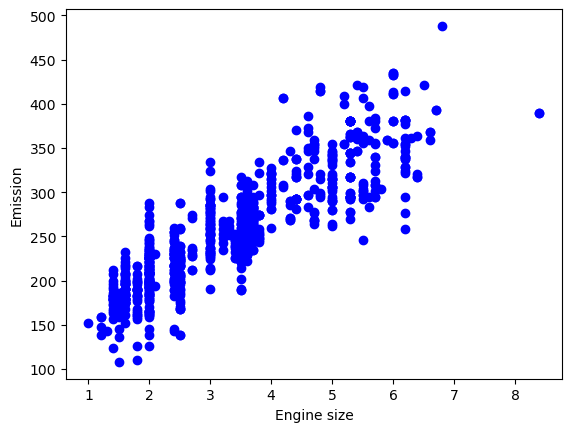

In [6]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Multiple Regression Model

The Multiple Linear Regression model is just the extension of the Simple Linear Regression model.

The __np.asanyarray__ function in NumPy is used to convert input data to an ndarray (i.e. to an N-dim array), but unlike __np.array__, it does not copy the data if the input is already an ndarray or a subclass of ndarray.

In other words:
__np.array__ returns always a new array, disregarding any existing subclass.
__np.asanyarray__ returns the input as is if it is already an array or a a subclass, preserving subclasses.

__Coefficient__ and __Intercept__ and __OLS__
__Coefficient__ and __Intercept__ are the parameters of the fittedt line. Given that it is a multiple linear regression model with 3 parameters and these parameters are the intercept and coefficients of the hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain __OLS (Ordinary Least Squares__) method to solve this problem.

__Coefficient__ is a multiplier of a variable (e.g., m in y = mx + b), i.e. it indicates the rate of change.

__Intercept__ is a vlaue where the graph crosses an axis (e.g. b in y = mx + b for the y-intercept). It indicates the value of y when x is 0.

__OLS__

Ordinary Least Squares (OLS) is a method for estimating the parameters in a linear regression model. The objective of OLS is to find the line (or hyperplane in higher dimensions) that best fits the data by minimizing the sum of the squares of the differences between the observed and predicted values. 

OLS can find the best parameters using of the following methods:
* Solving the model parameters analytically using closed-form equations
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

### Training

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[10.67445378  7.50608862  9.64561061]]
Intercept:  [65.458642]


### Prediction / Testing

In [8]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 538.69
Variance score: 0.87


C:\Users\boert\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


P.S.: The __variance score__ (regr.score() method in scikit-learn) is a measure of how well the model's predictions explain the variance of the actual data, often referred to as the __𝑅2 score__. 
It is a key metric in regression analysis to evaluate the model's performance. You can use the variance score (𝑅2 score) in both simple and multiple linear regression. The 𝑅2 score is a measure of how well the model's predictions explain the variability of the response variable, and it is applicable regardless of the number of predictors in your regression model. 

In [9]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y , y_hat) )

R2-score: 0.87


P.S.: The __r2_score()__ function and the __reg.score()__ method in scikit-learn both compute the 𝑅2 score, but they are used in different ways. See above, both of the results are same regardless you use regr.score() or r2_score() function! 

### Exercise-2

Now, we try to use a multiple linear regression with the same dataset, but this time we are using FUELCONSUMPTION_CITY and FUELCONSUMPTION_HWY instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

### Training

In [10]:
# First of all we have to define the regr/LinearRegression again because we have now 
# other features (four) instead of only three
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[10.70903367  7.23841206  5.98203437  3.46357367]]
Intercept:  [66.24301672]


### Prediction / Testing

In [11]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
y_hat = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
print("Mean Squared Error (MSE) : %.2f"
      % np.mean((y_hat - y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Mean Squared Error (MSE) : 538.27
Variance score: 0.87


C:\Users\boert\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [12]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y , y_hat))

R2-score: 0.87


__There is no improving, the result is almost the same even when we use 4 features instead of 3!__